## CodSoft
#### Task 2 :
##### Build a model that predicts the rating of a movie based on features like genre, director, and actors. You can use regression techniques to tackle this problem.
#### Dataset used : Movie Rating Prediction , https://www.kaggle.com/code/sherinclaudia/movie-rating-prediction/input?select=ratings.dat

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
# Loading datasets

movie_data = pd.read_csv('movies.dat', sep = '::', engine='python', encoding='latin-1')
movie_data.columns = ['Movie_ID', 'Movie_Name', 'Movie_Genre']

ratings_data = pd.read_csv('ratings.dat', sep = '::', engine='python', encoding='latin-1' )
ratings_data.columns = ['ID','MovieID','Ratings','TimeStamp']

user_data = pd.read_csv('users.dat', sep = '::', engine='python', encoding='latin-1')
user_data.columns = ['UserID','Gender','Age','Occupation','Zip-code']

In [3]:
movie_data.head()

,Movie_ID,Movie_Name,Movie_Genre
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [4]:
ratings_data.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [5]:
user_data.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [6]:
# information about the data

movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3882 entries, 0 to 3881
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Movie_ID     3882 non-null   int64 
 1   Movie_Name   3882 non-null   object
 2   Movie_Genre  3882 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [7]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000208 entries, 0 to 1000207
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   ID         1000208 non-null  int64
 1   MovieID    1000208 non-null  int64
 2   Ratings    1000208 non-null  int64
 3   TimeStamp  1000208 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [8]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6039 entries, 0 to 6038
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6039 non-null   int64 
 1   Gender      6039 non-null   object
 2   Age         6039 non-null   int64 
 3   Occupation  6039 non-null   int64 
 4   Zip-code    6039 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB


In [9]:
# concatinating all the data

final_data = pd.concat([movie_data, ratings_data, user_data], axis = 1)
final_data.head()

,Movie_ID,Movie_Name,Movie_Genre,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117


Text(0.5, 0, 'Age')

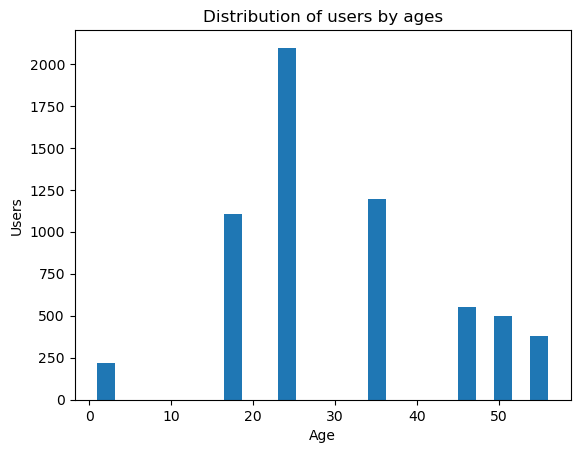

In [10]:
# Data Visualization

final_data.Age.plot.hist(bins=25)
plt.title("Distribution of users by ages")
plt.ylabel('Users')
plt.xlabel('Age')

<AxesSubplot:xlabel='Gender', ylabel='count'>

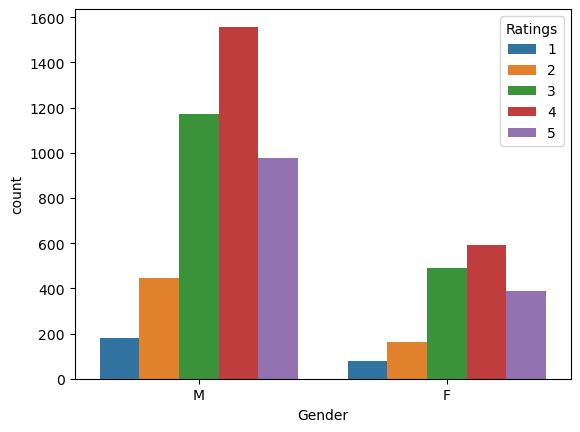

In [11]:
sns.countplot(x=final_data['Gender'], hue=final_data['Ratings'])

<AxesSubplot:xlabel='Age', ylabel='count'>

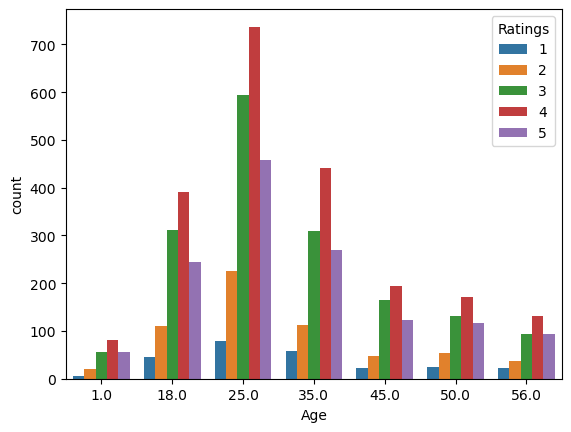

In [12]:
sns.countplot(x=final_data['Age'], hue=final_data['Ratings'])

In [13]:
data = final_data.copy()

In [14]:
# dropping unnecessary columns which will not help model training

data.drop(["Occupation", "TimeStamp", "Zip-code"], axis = 1, inplace = True)

In [15]:
# replace missing values of Age column with its mean value

age_mean = data['Age'].mean()
data['Age'].fillna(age_mean, inplace = True)

In [16]:
# removing the rows that contains NULL values 
data2 = data.copy()
data2.dropna(inplace = True)

In [17]:
# replacing Male with 0 - & Female with 1

data2.replace({'Gender': {'M':0, 'F':1}}, inplace = True)

#### Splitting Data for training and testing

In [18]:
X = data2.drop(['Ratings', 'Movie_Name', 'Movie_Genre', 'MovieID'], axis = 1)
Y = data2['Ratings']

X.head()

,Movie_ID,ID,UserID,Gender,Age
0,2.0,1,2.0,0,56.0
1,3.0,1,3.0,0,25.0
2,4.0,1,4.0,0,45.0
3,5.0,1,5.0,0,25.0
4,6.0,1,6.0,1,50.0


#### Training the Model using Logistic Regression

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_data = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaler_data, columns= X.columns)
scaled_df.head()

,Movie_ID,ID,UserID,Gender,Age
0,0.000000,0.0,0.000000,0.0,1.000000
1,0.000253,0.0,0.000258,0.0,0.436364
2,0.000506,0.0,0.000515,0.0,0.800000
3,0.000759,0.0,0.000773,0.0,0.436364
4,0.001013,0.0,0.001031,1.0,0.890909


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#### Model 1: Logistic Regression

In [21]:
model_lr = LogisticRegression(solver = 'lbfgs', max_iter = 10000)
model_lr.fit(X_train, Y_train)

model_lr_accuracy = model_lr.predict(X_test)
lr_accuracy_score = accuracy_score(Y_test, model_lr_accuracy)
print('Accuracy of Logistic Regression : ', lr_accuracy_score*100)

Accuracy of Logistic Regression :  36.55083655083655


#### Model 2: Support Vector Machines

In [22]:
model_svm = SVC()
model_svm.fit(X_train, Y_train)


svm_model_accuracy = model_svm.predict(X_test)
svm_model_score = accuracy_score(Y_test, svm_model_accuracy)
print('Accuracy of SVC : ', svm_model_score*100)

Accuracy of SVC :  36.80823680823681


#### Model 3: DecisionTreeClassifier

In [23]:
dc_model = DecisionTreeClassifier()
dc_model.fit(X_train, Y_train)

dc_model_accuracy = dc_model.predict(X_test)
dc_model_score = accuracy_score(Y_test, dc_model_accuracy)
print('Accuracy of DecisionTreeClassifier : ', dc_model_score*100)

Accuracy of DecisionTreeClassifier :  29.08622908622909


#### Model 4: KNeighborsClassifier

In [24]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)

knn_model_accuracy = knn_model.predict(X_test)
knn_model_score = accuracy_score(Y_test, knn_model_accuracy)
print('Accuracy of KNeighborsClassifier : ', knn_model_score*100)

Accuracy of KNeighborsClassifier :  31.66023166023166


C:\Users\Dipendra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [25]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vectore Machine', 'DecisionTreeClassifier', 
              'KNeighborsClassifier'],
    'Score': [lr_accuracy_score*100, svm_model_score*100, dc_model_score*100, knn_model_score*100]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Support Vectore Machine,36.808237
0,Logistic Regression,36.550837
3,KNeighborsClassifier,31.660232
2,DecisionTreeClassifier,29.086229
